In [1]:
# %%capture
# !rm -rf sample_data/
# !sudo apt-get install megatools
# !sudo apt-get install p7zip-full
# !pip3 install torch

##### DOWNLOAD & EXTRACT DATASET
# !megadl https://mega.nz/#!7KIVFAoI!pO3RJVN0CYz3w2yzKm2lstl9nPYpemINtFFyq_P3I4o
# !p7zip -d dataset.7z
# !mkdir models

# ##### SETUP SSH KEY FOR PRIVATE GITLAB REPOS
# !megadl "https://mega.nz/#!WeIwQa6C!h-Gb1OgEDlJAqqdaXj8-DKA9ifEC89VSNA3VJuJSYxg" 
# !unzip ssh-keys-colab.zip; rm ssh-keys-colab.zip
# !mkdir -p /root/.ssh/
# !mv ssh-keys-colab/* /root/.ssh/; chmod 600 /root/.ssh/id_rsa; rm -rf ssh-keys-colab/

# !eval $(ssh-agent)

# !touch /root/.ssh/known_hosts
# !ssh-keyscan -t rsa gitlab.lrz.de >> /root/.ssh/known_hosts

%load_ext autoreload
%autoreload 2

In [ ]:
# %%capture
##### DOWNLOAD THE RELEVANT DIR FROM GITLAB (NOT PUSHABLE)
# !git archive --remote=git@gitlab.lrz.de:tdcv---group-b/tracking-detection-in-cv---ws1920.git master assignment3 | tar xvf - 
# !mv assignment3/* .; rm -rf assignment3/

#Run our best pretrained model

#### - Our best model was trained with `batch_size = 2048`, `num_epochs = 50`, `lr = 1e-3`

#### - Logs and visualizations (including embedding visualization by Tensorboard projector) of the our best pretrained model are stores in ./runs/best/ and can be shown by Tensorboard 

D:\Program-Files\Anaconda3\envs\hands-on\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
D:\Program-Files\Anaconda3\envs\hands-on\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
D:\Program-Files\Anaconda3\envs\hands-on\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
D:\Program-Files\Anaconda3\envs\hands-on\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


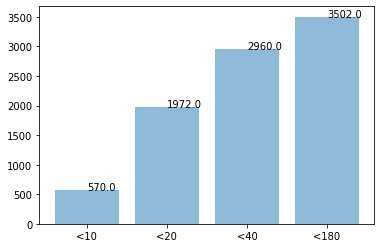

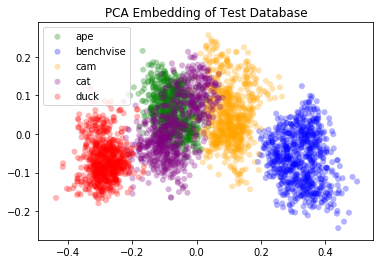

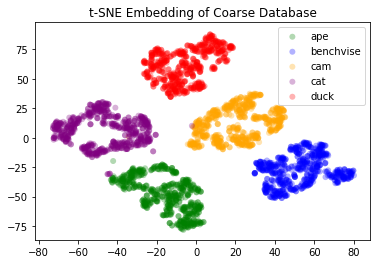

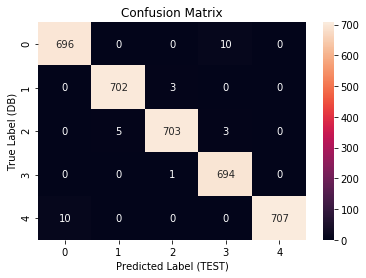

In [1]:
import os
import torch
import numpy as np
import net
import viz
import data_generator
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dg = data_generator.DataGenerator(root='./dataset', batch_size=2048)

ckp_path = os.path.join('models', 'best.pt')
model = net.Net()
model, _ = net.load_ckp(ckp_path, model)
test_descriptors = net.compute_descriptor(model, dg.test_loader)

hist_fig, pca_fig, tsne_fig, confusion_fig = viz.get_all_plots(model, dg, test_descriptors)

hist_fig.show()
pca_fig.show()
tsne_fig.show()
confusion_fig.show()


#Train models from scratch

In [ ]:
import data_generator
import train

batch_size = 128
dg = data_generator.DataGenerator(root='./dataset', batch_size=batch_size)
train.run(dg, batch_size=batch_size, num_epochs=10, lr=5e-4)

NUM_EPOCHS = 10, BATCH_SIZE = 128, len(train_set) = 20 --> #Iterations = 10

Epoch 1
Epoch avg. loss: 0.0616, Epoch acc: 1759/3534 = 49.7736% ([<10]: 13, [<20], 102, [<40]: 351
Epoch 2
Epoch avg. loss: 0.0194, Epoch acc: 1697/3534 = 48.0192% ([<10]: 21, [<20], 115, [<40]: 344
Epoch 3
Epoch avg. loss: 0.0050, Epoch acc: 1618/3534 = 45.7838% ([<10]: 2, [<20], 51, [<40]: 230
Epoch 4
Epoch avg. loss: 0.0613, Epoch acc: 1482/3534 = 41.9355% ([<10]: 20, [<20], 89, [<40]: 346
Epoch 5


#test.py

# Create historgrams and embedding for all checkpoints to visualize in Tensorboard

In [ ]:
# writer = SummaryWriter()
# checkpoint_files = datasets.sorted_alphanumeric(os.listdir('models'))

# for i, file in enumerate(checkpoint_files):
#     print(file)
#     # file = 'checkpoint150.pt'
#     ckp_path = os.path.join('models', file)
#     model = net.Net()
#     model, _ = net.load_ckp(ckp_path, model)
#     test_descriptors = net.compute_descriptor(model, dg.test_loader)

#     bins, hist_fig = viz.compute_histogram(model, dg, test_descriptors=test_descriptors)
#     pca_fig = pca_plot(test_descriptors.cpu().numpy())
#     tsne_fig = tsne_plot(test_descriptors.cpu().numpy())
#     confusion_fig = viz.get_confusion_heatmap(model, dg, test_descriptors)

#     writer.add_figure("Histogram", hist_fig, global_step=i)
#     writer.add_figure("PCA", pca_fig, global_step=i)
#     writer.add_figure("t-SNE", tsne_fig, global_step=i)
#     writer.add_figure("Confusion Heatmap", confusion_fig, global_step=i)

#     # viz.get_histogram_figure(bins)
#     # hist_fig.show()
#     # writer.add_embedding(test_descriptors, metadata=dg.test_labels, tag='test_descriptors')
#     # writer.add_embedding(test_descriptors, metadata=dg.test_labels, label_img=dg.test_images,
#                         #  tag='test_descriptors (w/ images)')

# writer.close()

In [ ]:
import test

test.run(dg)

In [ ]:
%%capture
!zip -r models_e200_bs4096_i400.zip models/
!zip -r runs_e200_bs4096_i400.zip runs/